In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_shape=(128, 128, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # Encoder: Contracting path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder: Expanding path
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

""" from tensorflow.keras.datasets import fashion_mnist

# Cargar el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar las imágenes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 """

input_shape = (128, 128, 3)

# Crear el modelo U-Net
unet = unet_model(input_shape=input_shape, num_classes=1)
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
unet.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_71 (Conv2D)  │ (None, 128, 128,  │      1,792 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_72 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_71[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 64, 64,    │          0 │ conv2d_72[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_73 (Conv2D)  │ (None, 64, 64,    │    131,200 │ max_pooling2d_16… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_74 (Conv2D)  │ (None, 64, 64,    │    262,272 │ conv2d_73[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 32, 32,    │          0 │ conv2d_74[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_75 (Conv2D)  │ (None, 32, 32,    │    491,776 │ max_pooling2d_17… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_75[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 16, 16,    │          0 │ conv2d_76[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_18… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_78 (Conv2D)  │ (None, 16, 16,    │  2,359,808 │ conv2d_77[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 8, 8, 512) │          0 │ conv2d_78[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_79 (Conv2D)  │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_19… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_80 (Conv2D)  │ (None, 8, 8,      │  9,438,208 │ conv2d_79[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_15 │ (None, 16, 16,    │  2,097,664 │ conv2d_80[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 16, 16,    │          0 │ conv2d_transpose

 Total params: 31,400,385 (119.78 MB)

 Trainable params: 31,400,385 (119.78 MB)

 Non-trainable params: 0 (0.00 B)

Probamos codificar otra CNN manualmente siguiendo la misma estructura

(28, 64, 64, 1)
(60000,)


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_251 (Conv2D) │ (None, 64, 64,    │        320 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_252 (Conv2D) │ (None, 64, 64,    │      9,248 │ conv2d_251[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_55    │ (None, 32, 32,    │          0 │ conv2d_252[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_253 (Conv2D) │ (None, 32, 32,    │     18,496 │ max_pooling2d_55… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_254 (Conv2D) │ (None, 32, 32,    │     36,928 │ conv2d_253[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_56    │ (None, 16, 16,    │          0 │ conv2d_254[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_255 (Conv2D) │ (None, 16, 16,    │     73,856 │ max_pooling2d_56… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_256 (Conv2D) │ (None, 16, 16,    │    147,584 │ conv2d_255[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_57    │ (None, 8, 8, 128) │          0 │ conv2d_256[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_257 (Conv2D) │ (None, 8, 8, 256) │    295,168 │ max_pooling2d_57… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_258 (Conv2D) │ (None, 8, 8, 256) │    590,080 │ conv2d_257[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_58    │ (None, 4, 4, 256) │          0 │ conv2d_258[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_259 (Conv2D) │ (None, 4, 4, 512) │  1,180,160 │ max_pooling2d_58… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_260 (Conv2D) │ (None, 4, 4, 512) │  2,359,808 │ conv2d_259[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_59    │ (None, 2, 2, 512) │          0 │ conv2d_260[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_261 (Conv2D) │ (None, 2, 2,      │  4,719,616 │ max_pooling2d_59… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_262 (Conv2D) │ (None, 2, 2,      │  9,438,208 │ conv2d_261[0][0]  │
│                     │ 1024)             │            │                 

 Total params: 31,032,965 (118.38 MB)

 Trainable params: 31,032,965 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 7.8474e-05 - loss: 0.0000e+00
Precisión en el conjunto de prueba: 7.847377128200606e-05
Pérdida en el conjunto de prueba: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


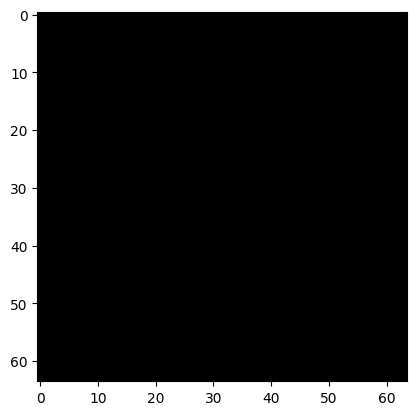

In [13]:
def unet_model_2(input_shape=(128, 128, 3), num_clases=10):
  inputs = layers.Input(shape=input_shape)

  # Encoder: Contracting path
  c1 = layers.Conv2D(32, (3 , 3), activation="relu", padding="same")(inputs)
  c1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(c1)
  p1 = layers.MaxPooling2D((2, 2))(c1)

  c2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(p1)
  c2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c2)
  p2 = layers.MaxPooling2D((2, 2))(c2)

  c3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(p2)
  c3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c3)
  p3 = layers.MaxPooling2D((2, 2))(c3)

  c4 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(p3)
  c4 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(c4)
  p4 = layers.MaxPooling2D((2, 2))(c4)

  c5 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(p4)
  c5 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(c5)
  p5 = layers.MaxPooling2D((2, 2))(c5)

  # Bottleneck
  c6 = layers.Conv2D(1024, (3, 3), activation="relu", padding="same")(p5)
  c6 = layers.Conv2D(1024, (3, 3), activation="relu", padding="same")(c6)

  # Decoder: Expanding path
  u7 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same")(c6)
  u7 = layers.concatenate([u7, c5])
  c7 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(u7)
  c7 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(c7)

  u8 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(c7)
  u8 = layers.concatenate([u8, c4])
  c8 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(u8)
  c8 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(c8)

  u9 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c8)
  u9 = layers.concatenate([u9, c3])
  c9 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(u9)
  c9 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c9)

  u10 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c9)
  u10 = layers.concatenate([u10, c2])
  c10 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(u10)
  c10 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c10)

  u11 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c10)
  u11 = layers.concatenate([u11, c1])
  c11 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(u11)
  c11 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(c11)

  outputs = layers.Conv2D(num_clases, (1, 1), activation="softmax")(c11)

  model = models.Model(inputs=[inputs], outputs=[outputs])
  return model

from tensorflow.keras.datasets import fashion_mnist

# Cargar el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar las imágenes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# cambiar el tamaño de las imágenes a 64x64
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_train = x_train.transpose((2, 0, 1))
x_train = tf.expand_dims(x_train, axis=-1)

x_test = tf.image.resize(x_test, (64, 64)).numpy()

# imprimimos las dimensiones de los datos
print(x_train.shape)
print(y_train.shape)

input_shape = (64, 64, 1)

# Crear el modelo U-Net
unet_2 = unet_model_2(input_shape=input_shape, num_clases=1)
unet_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Resumen del modelo
unet_2.summary()

# Entrear el modelo
unet_2.fit(x_train, x_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluar el modelo
test_loss, test_acc = unet_2.evaluate(x_train, x_train)
print("Precisión en el conjunto de prueba:", test_acc)
print("Pérdida en el conjunto de prueba:", test_loss)

# Predicción
predictions = unet_2.predict(x_train)
predictions.shape

# Mostramos el primer ejemplo
import matplotlib.pyplot as plt

plt.imshow(predictions[0], cmap="gray")
plt.show()